# Multiple Linear Regression


__Multiple Linear Regression__ uses two or more independent variables to predict the values of the dependent variable. It is based on the following equation that we’ll explore later on:

$y = b + m1x1 + m2x2 + ... + mnxn$

#### Imports

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
streeteasy = pd.read_csv("manhattan.csv")
df = pd.DataFrame(streeteasy)

print(df.head())

   rental_id   rent  bedrooms  bathrooms  size_sqft  min_to_subway  floor  \
0       1545   2550       0.0          1        480              9    2.0   
1       2472  11500       2.0          2       2000              4    1.0   
2       2919   4500       1.0          1        916              2   51.0   
3       2790   4795       1.0          1        975              3    8.0   
4       3946  17500       2.0          2       4800              3    4.0   

   building_age_yrs  no_fee  has_roofdeck  has_washer_dryer  has_doorman  \
0                17       1             1                 0            0   
1                96       0             0                 0            0   
2                29       0             1                 0            1   
3                31       0             0                 0            1   
4               136       0             0                 0            1   

   has_elevator  has_dishwasher  has_patio  has_gym       neighborhood  \
0     

In [3]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]

## Training Set vs. Test Set
As with most machine learning algorithms, we have to split our dataset into:
<ul>
    <li><strong>Training set:</strong> the data used to fit the model</li>
    <li><strong>Test set:</strong> the data partitioned away at the very start of the experiment (to provide an unbiased evaluation of the model)</li>
</ul>

In general, putting 80% of your data in the training set and 20% of your data in the test set is a good place to start.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)
print(x_train.shape)
print(x_test.shape)
 
print(y_train.shape)
print(y_test.shape)

(2831, 14)
(708, 14)
(2831, 1)
(708, 1)


Here are the parameters:
<ul>
    <li><code>train_size:</code> the proportion of the dataset to include in the train split (between 0.0 and 1.0)</li>
    <li><code>test_size:</code> the proportion of the dataset to include in the test split (between 0.0 and 1.0)</li>
    <li><code>random_state:</code> the seed used by the random number generator [optional]</li>
</ul>

## Multiple Linear Regression: Scikit-Learn

The steps for multiple linear regression in scikit-learn are identical to the steps for simple linear regression. Just like simple linear regression, we need to import LinearRegression from the linear_model module:

In [5]:
from sklearn.linear_model import LinearRegression

Then, create a `LinearRegression` model, and then fit it to your `x_train` and `y_train` data:

In [6]:
mlr = LinearRegression()

# finds the coefficients and the intercept value
mlr.fit(x_train, y_train) 

LinearRegression()

We can also use the `.predict()` function to pass in `x-values?. It returns the `y-values` that this plane would predict:

In [7]:
"""
Takes values calculated by .fit() and the x values, 
plugs them into the multiple linear regression equation, and calculates the predicted y values.
""" 
y_predicted = mlr.predict(x_test)

## Visualizing Results with Matplotlib

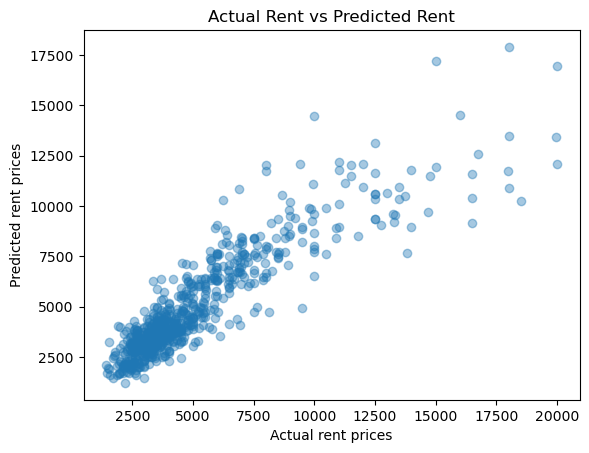

In [13]:
# Create a scatter plot
plt.scatter(y_test, y_predicted, alpha=0.4)
 
# Create x-axis label and y-axis label
plt.xlabel("Actual rent prices")
plt.ylabel("Predicted rent prices")
 
# Create a title
plt.title("Actual Rent vs Predicted Rent")
 
# Show the plot
plt.show()

In our Manhattan model, we used 14 variables, so there are 14 coefficients:

`[ -302.73009383  1199.3859951  4.79976742 
 -24.28993151  24.19824177 -7.58272473  
-140.90664773  48.85017415 191.4257324  
-151.11453388  89.408889  -57.89714551  
-19.31948556  -38.92369828 ]`


- `bedrooms` - number of bedrooms
- `bathrooms` - number of bathrooms
- `size_sqft` - size in square feet
- `min_to_subway` - distance from subway station in minutes
- `floor` - floor number
- `building_age_yrs` - building’s age in years
- `no_fee` - has no broker fee (0 for fee, 1 for no fee)
- `has_roofdeck` - has roof deck (0 for no, 1 for yes)
- `has_washer_dryer` - has in-unit washer/dryer (0/1)
- `has_doorman` - has doorman (0/1)
- `has_elevator` - has elevator (0/1)
- `has_dishwasher` - has dishwasher (0/1)
- `has_patio` - has patio (0/1)
- `has_gym` - has gym (0/1)

To see if there are any features that don’t affect price linearly, let’s graph the different features against `rent`.

__Interpreting graphs__ 

In regression, the independent variables will either have a positive linear relationship to the dependent variable, a negative linear relationship, or no relationship. A negative linear relationship means that as X values increase, Y values will decrease. Similarly, a positive linear relationship means that as X values increase, Y values will also increase.

Graphically, when you see a downward trend, it means a negative linear relationship exists. When you find an upward trend, it indicates a positive linear relationship. Here are two graphs indicating positive and negative linear relationships:

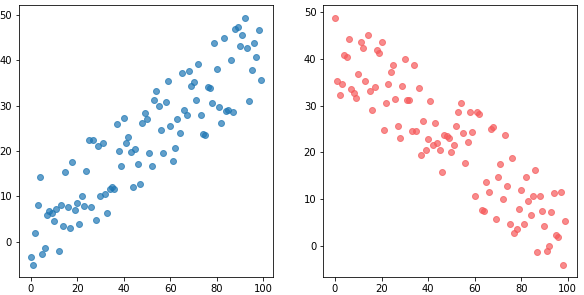

## Correlations

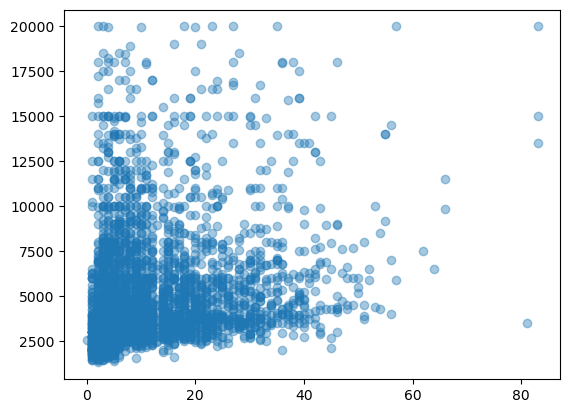

In [19]:
plt.scatter(df[['floor']], df[['rent']], alpha=0.4)

plt.show()

## Evaluating the Model's Accuracy

When trying to evaluate the accuracy of our multiple linear regression model, one technique we can use is __Residual Analysis__.

The difference between the actual value $y$, and the predicted value $ŷ$ is the __residual e__. The equation is:

$e = y - ŷ$

n the StreetEasy dataset, $y$ is the actual rent and the $ŷ$ is the predicted rent. The real y values should be pretty close to these predicted y values.

`sklearn‘s linear_model.LinearRegression` comes with a `.score()` method that returns the coefficient of determination R² of the prediction.

The coefficient R² is defined as:

$1 - u/v$

where $u$ is the residual sum of squares:

`((y - y_predict) ** 2).sum()`

and v is the total sum of squares (TSS):

`((y - y.mean()) ** 2).sum()`

The TSS tells you how much variation there is in the y variable.

R² is the percentage variation in y explained by all the x variables together.

For example, say we are trying to predict `rent` based on the `size_sqft` and the `bedrooms` in the apartment and the R² for our model is 0.72 — that means that all the x variables (square feet and number of bedrooms) together explain 72% variation in y (`rent`).

Now let’s say we add another x variable, building’s age, to our model. By adding this third relevant x variable, the R² is expected to go up. Let say the new R² is 0.95. This means that square feet, number of bedrooms and age of the building together explain 95% of the variation in the rent.

The best possible R² is 1.00 (and it can be negative because the model can be arbitrarily worse). Usually, a R² of 0.70 is considered good.

Train score: 0.7725460559817883
Test score: 0.8050371975357664


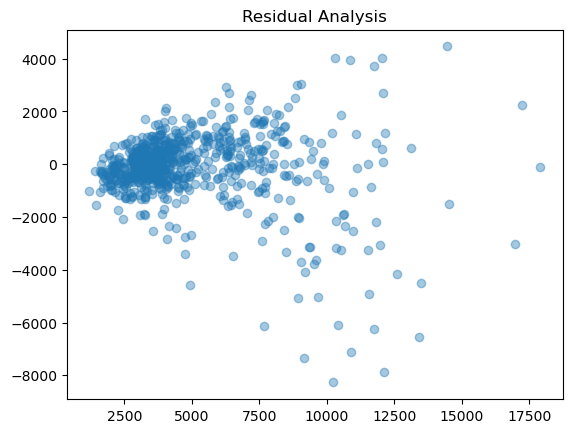

In [21]:
y_predict = mlr.predict(x_test)

print("Train score: " + str(mlr.score(x_train, y_train)))

print("Test score: " + str(mlr.score(x_test, y_test)))

residuals = y_predict - y_test
 
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
 
plt.show()